In [6]:
import numpy as np
import matplotlib.pyplot as plt

class HebbMemoryNetwork:
    def __init__(self):
        self.a_in = -1 * np.ones((9, 7))
        self.a_in[-1, 0] = self.a_in[-2, 0] = self.a_in[-3, 1] = self.a_in[-4, 1] = self.a_in[2:5, 2] = self.a_in[0:2, 3] = self.a_in[4, 3] = self.a_in[2:5, 4] = self.a_in[5:7, -2] = self.a_in[7:9, -1] = 1
        self.a_out = np.ones((5, 3))
        self.a_out[0, 0] = self.a_out[1, 1] = self.a_out[0, 2] = self.a_out[3:5, 1] = -1
        self.b_in = -1 * np.ones((9, 7))
        self.b_in[:, 0] = self.b_in[0, 0:5] = self.b_in[1, -2] = self.b_in[2, -1] = self.b_in[3, -2] = self.b_in[4, 0:5] = self.b_in[5, -2] = self.b_in[6, -1] = self.b_in[7, -2] = self.b_in[-1, 0:5] = 1
        self.b_out = np.ones((5, 3))
        self.b_out[0, 2] = self.b_out[1, 1] = self.b_out[2, 2] = self.b_out[3, 1] = self.b_out[4, 2] = -1
        self.c_in = -1 * np.ones((9, 7))
        self.c_in[0, 2:5] = self.c_in[1, 1] = self.c_in[1, -2] = self.c_in[2, -1] = self.c_in[2:7, 0] = self.c_in[-3, -1] = self.c_in[-2, 1] = self.c_in[-2, -2] = self.c_in[-1, 2:5] = 1
        self.c_out = np.ones((5, 3))
        self.c_out[1:4, 1:3] = -1

        self.w = self.calculate_weights()

    def calculate_weights(self):
        a_in_flat = self.a_in.reshape((63, 1))
        a_out_flat = self.a_out.reshape((15, 1))
        b_in_flat = self.b_in.reshape((63, 1))
        b_out_flat = self.b_out.reshape((15, 1))
        c_in_flat = self.c_in.reshape((63, 1))
        c_out_flat = self.c_out.reshape((15, 1))

        weights = a_in_flat @ a_out_flat.T + b_in_flat @ b_out_flat.T + c_in_flat @ c_out_flat.T
        return weights

    def test_pattern(self, pattern):
        pattern_flat = pattern.reshape((63, 1))
        output = np.sign(pattern_flat.T @ self.w)
        return np.reshape(output, (5, 3))

    def generate_noisy_pattern(self, pattern, noise_level):
        noisy_pattern = pattern.copy()
        num_noise_bits = int(noise_level * 63)
        noisy_indices = np.random.choice(63, num_noise_bits, replace=False)
        
        for i in noisy_indices:
            noisy_pattern[i//7][i%7] = -pattern[i//7][i%7]
        
        return noisy_pattern

    def evaluate_pattern(self, original_pattern, output_pattern):
        error = output_pattern - original_pattern
        return (error == 0).all()
    
    def visualize_memory(self):
        plt.subplot(3, 2, 1)
        plt.imshow(self.a_in)
        plt.subplot(3, 2, 2)
        plt.imshow(self.a_out)
        plt.subplot(3, 2, 3)
        plt.imshow(self.b_in)
        plt.subplot(3, 2, 4)
        plt.imshow(self.b_out)
        plt.subplot(3, 2, 5)
        plt.imshow(self.c_in)
        plt.subplot(3, 2, 6)
        plt.imshow(self.c_out)
        


Reconstruction success rate for Letters (A, B, C) with 20% noise in input: (1.0, 0.97, 0.92)
Reconstruction success rate for Letters (A, B, C) with 25% noise in input: (0.99, 0.97, 0.86)
Reconstruction success rate for Letters (A, B, C) with 30% noise in input: (0.96, 0.81, 0.82)
Reconstruction success rate for Letters (A, B, C) with 35% noise in input: (0.86, 0.63, 0.69)
Reconstruction success rate for Letters (A, B, C) with 40% noise in input: (0.57, 0.51, 0.47)


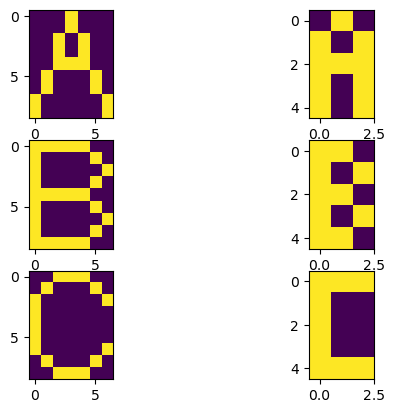

In [8]:
def noisy_evaluation(p):
    network = HebbMemoryNetwork()
    a_noise = []
    b_noise = []
    c_noise = []

    for i in range(100):
        a_test = network.generate_noisy_pattern(network.a_in, p)
        b_test = network.generate_noisy_pattern(network.b_in, p)
        c_test = network.generate_noisy_pattern(network.c_in, p)

        a_out = network.test_pattern(a_test)
        b_out = network.test_pattern(b_test)
        c_out = network.test_pattern(c_test)

        a_noise.append(network.evaluate_pattern(network.a_out, a_out))
        b_noise.append(network.evaluate_pattern(network.b_out, b_out))
        c_noise.append(network.evaluate_pattern(network.c_out, c_out))

    p_a_noise = np.sum(a_noise) / 100
    p_b_noise = np.sum(b_noise) / 100
    p_c_noise = np.sum(c_noise) / 100

    return p_a_noise, p_b_noise, p_c_noise

# Create an instance of the HebbMemoryNetwork class
network = HebbMemoryNetwork()
network.visualize_memory()

# Test the patterns with noise levels
print(f'Reconstruction success rate for Letters (A, B, C) with 20% noise in input: {noisy_evaluation(0.20)}')
print(f'Reconstruction success rate for Letters (A, B, C) with 25% noise in input: {noisy_evaluation(0.25)}')
print(f'Reconstruction success rate for Letters (A, B, C) with 30% noise in input: {noisy_evaluation(0.30)}')
print(f'Reconstruction success rate for Letters (A, B, C) with 35% noise in input: {noisy_evaluation(0.35)}')
print(f'Reconstruction success rate for Letters (A, B, C) with 40% noise in input: {noisy_evaluation(0.40)}')



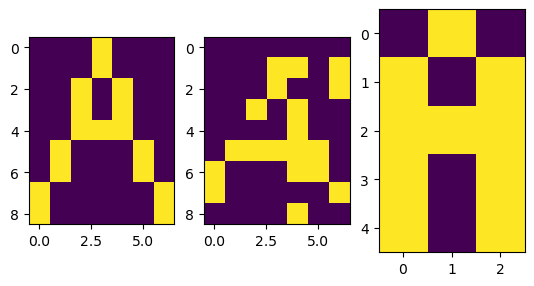

In [19]:
noisy = network.generate_noisy_pattern(network.a_in, 0.3)
reconstructed = network.test_pattern(noisy)
plt.subplot(1, 3, 1)
plt.imshow(network.a_in)
plt.subplot(1, 3, 2)
plt.imshow(noisy)
plt.subplot(1, 3, 3)
plt.imshow(reconstructed)
